In [1]:

import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.cluster import KMeans


def extract_color_histograms(image_path, patch_size=32, bins=8):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    
    height, width, _ = image.shape
    patches = []

    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            patch = image[i:min(i + patch_size, height), j:min(j + patch_size, width)]
            histograms = []

            for channel in range(3):
                hist = cv2.calcHist([patch], [channel], None, [bins], [0, 256])
                hist = hist / np.sum(hist)
                histograms.append(hist.flatten())
            
            feature_vector = np.concatenate(histograms)
            patches.append(feature_vector)
    
    return np.array(patches)


def process_raw_images(image_directory, feature_output_directory):
    if not os.path.exists(feature_output_directory):
        os.makedirs(feature_output_directory)
    
    for image_file in os.listdir(image_directory):
        if image_file.endswith(('.jpg', '.png', '.jpeg')):  
            image_path = os.path.join(image_directory, image_file)
            print(f"Processing image: {image_file}")
            
            feature_vectors = extract_color_histograms(image_path)
            class_name = os.path.splitext(image_file)[0]
            output_file = os.path.join(feature_output_directory, f"{class_name}_features.npy")
            np.save(output_file, feature_vectors)


image_directory = 'desktop/internship/group05/test/cottage_garden'
output_directory = 'desktop/internship/featureVector/music_store/test'          
process_raw_images(image_directory, output_directory)

image_directory = 'desktop/internship/group05/train/cottage_garden'
output_directory = 'desktop/internship/featureVector/music_store/train'          
process_raw_images(image_directory, output_directory)


image_directory = 'desktop/internship/group05/test/firing_range_indoor'
output_directory = 'desktop/internship/featureVector/bayou/test'          
process_raw_images(image_directory, output_directory)


image_directory = 'desktop/internship/group05/train/firing_range_indoor'
output_directory = 'desktop/internship/featureVector/bayou/train'          
process_raw_images(image_directory, output_directory)


image_directory = 'desktop/internship/group05/test/pharmacy'
output_directory = 'desktop/internship/featureVector/desert_vegetation/test'          
process_raw_images(image_directory, output_directory)


image_directory = 'desktop/internship/group05/train/pharmacy'
output_directory = 'desktop/internship/featureVector/desert_vegetation/train'          
process_raw_images(image_directory, output_directory)


def load_all_feature_vectors(directory):
    all_features = []
    
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        
        if os.path.isfile(file_path) and file.endswith(".npy"):
            features = np.load(file_path)
            all_features.append(features)
    
    if all_features:
        return np.vstack(all_features)

# %%
def compute_bovw_representation(image_features, centroids):
    n_clusters = len(centroids)
    distances = np.zeros((len(image_features), n_clusters))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(image_features - centroid, axis=1)
    idx = np.argmin(distances, axis=1)
    
    cluster_counts = np.bincount(idx, minlength=n_clusters)
    bovw_vector = cluster_counts / len(image_features)
    return bovw_vector

# %%
def process_features_for_bovw(feature_directory, bovw_output_directory, centroids):
    if not os.path.exists(bovw_output_directory):
        os.makedirs(bovw_output_directory)
    
    for file in tqdm(os.listdir(feature_directory)):
        if file.endswith('_features.npy'):
            feature_path = os.path.join(feature_directory, file)
            image_features = np.load(feature_path)
            
            bovw_vector = compute_bovw_representation(image_features, centroids)
            
            output_file = os.path.join(
                bovw_output_directory, 
                file.replace('_features.npy', '_bovw.npy')
            )
            np.save(output_file, bovw_vector)

# %%
all_features = np.vstack([
    load_all_feature_vectors('desktop/internship/featureVector/bayou/train'),
    load_all_feature_vectors('desktop/internship/featureVector/desert_vegetation/train'),
    load_all_feature_vectors('desktop/internship/featureVector/music_store/train')
])
kmeans = KMeans(n_clusters=32, max_iter=100, random_state=0, n_init=10)
kmeans.fit(all_features)
centroids = kmeans.cluster_centers_

for category in ['bayou', 'desert_vegetation', 'music_store']:
    for split in ['train', 'test']:
        feature_dir = os.path.join('featureVector', category, split)
        bovw_dir = os.path.join('output', category, split)
        process_features_for_bovw(feature_dir, bovw_dir, centroids)

Processing image: sun_bixocmedlrkixute.jpg
Processing image: sun_aqgrlxjqpobcqhuw.jpg
Processing image: sun_aegvcwvnndzvjxbn.jpg
Processing image: sun_bwckshcmmalddshu.jpg
Processing image: sun_acwibvnrdblvjrtc.jpg
Processing image: sun_aqieabyuefpzpjlx.jpg
Processing image: sun_bgdjfnudubhythig.jpg
Processing image: sun_bvpfwnjoqedmxorf.jpg
Processing image: sun_amuuybnpnmzbqrox.jpg
Processing image: sun_baeykmqyxbclqnmp.jpg
Processing image: sun_awotallxbnaandte.jpg
Processing image: sun_arucjoypxuyanyzk.jpg
Processing image: sun_bntyncnrbemolgyd.jpg
Processing image: sun_awnymqfrhpdbudar.jpg
Processing image: sun_alboyjiyzpdygeev.jpg
Processing image: sun_akjnvoveloljjmbv.jpg
Processing image: sun_bptumjsgxpctayvh.jpg
Processing image: sun_bhmxtxaxpbguluvl.jpg
Processing image: sun_aquatqmgkhxsdbfp.jpg
Processing image: sun_baqyxzjyzoymmdun.jpg
Processing image: sun_amokkccjvzriwxfx.jpg
Processing image: sun_afqjoiijrzjnzyyo.jpg
Processing image: sun_aiehyxoktuxqejwq.jpg
Processing 

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 366.65it/s]


Evaluating GMM with 1 mixtures...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluating GMM with 2 mixtures...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluating GMM with 4 mixtures...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluating GMM with 8 mixtures...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluating GMM with 32 mixtures...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of mixtures: 1
  Accuracy: 0.7248
  Precision: [0.578125   0.72093023 0.95238095]
  Recall: [0.75510204 0.62       0.8       ]
  F1 Score: [0.65486726 0.66666667 0.86956522]
  Mean Precision: 0.7505
  Mean Recall: 0.7250
  Mean F1 Score: 0.7304
Number of mixtures: 2
  Accuracy: 0.5973
  Precision: [0.62068966 0.56818182 0.60526316]
  Recall: [0.36734694 0.5        0.92      ]
  F1 Score: [0.46153846 0.53191489 0.73015873]
  Mean Precision: 0.5980
  Mean Recall: 0.5958
  Mean F1 Score: 0.5745
Number of mixtures: 4
  Accuracy: 0.5101
  Precision: [0.44086022 0.55       0.66666667]
  Recall: [0.83673469 0.22       0.48      ]
  F1 Score: [0.57746479 0.31428571 0.55813953]
  Mean Precision: 0.5525
  Mean Recall: 0.5122
  Mean F1 Score: 0.4833
Number of mixtures: 8
  Accuracy: 0.5772
  Precision: [0.5        0.62068966 0.65384615]
  Recall: [0.69387755 0.36       0.68      ]
  F1 Score: [0.58119658 0.4556962  0.66666667]
  Mean Precision: 0.5915
  Mean Recall: 0.5780
  Mean F1 Score:

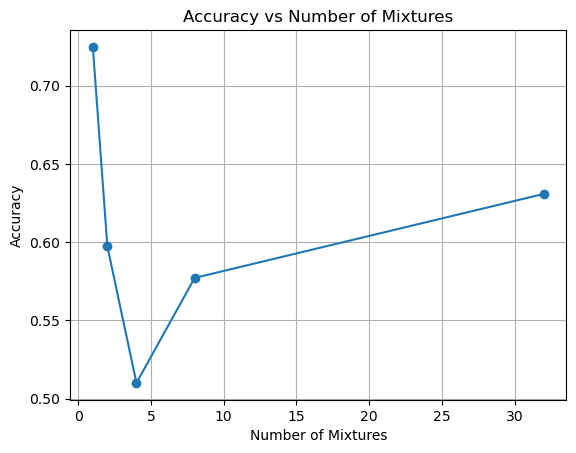

GMM log-likelihood for 1 mixtures, class 0: 69.79777599268228
GMM log-likelihood for 1 mixtures, class 1: 78.16848993159209
GMM log-likelihood for 1 mixtures, class 2: 91.24627708786548
GMM log-likelihood for 2 mixtures, class 0: 98.32329124404187
GMM log-likelihood for 2 mixtures, class 1: 102.66213917378505
GMM log-likelihood for 2 mixtures, class 2: 111.436271783263
GMM log-likelihood for 4 mixtures, class 0: 113.52958596631179
GMM log-likelihood for 4 mixtures, class 1: 137.79916837816626
GMM log-likelihood for 4 mixtures, class 2: 140.59044155908157
GMM log-likelihood for 8 mixtures, class 0: 144.5754417542794
GMM log-likelihood for 8 mixtures, class 1: 153.82407584274245
GMM log-likelihood for 8 mixtures, class 2: 158.49957465885726
GMM log-likelihood for 32 mixtures, class 0: 183.06669204067057
GMM log-likelihood for 32 mixtures, class 1: 183.64287745017117
GMM log-likelihood for 32 mixtures, class 2: 182.89929960744345


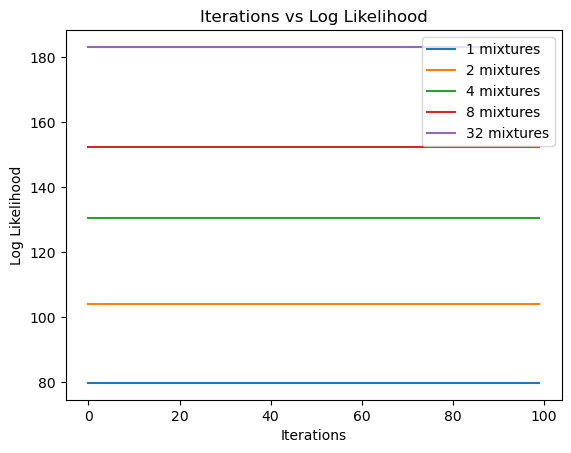

Confusion Matrix for 1 mixtures:


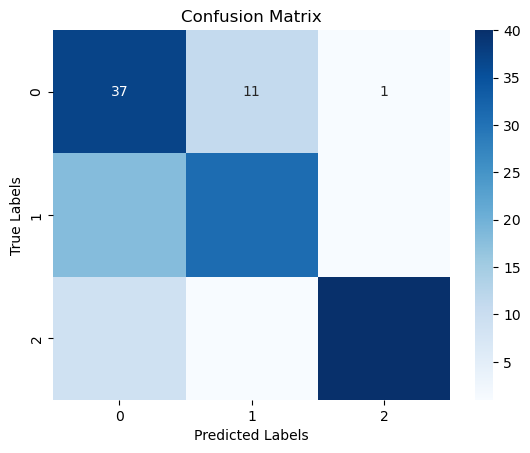

Confusion Matrix for 2 mixtures:


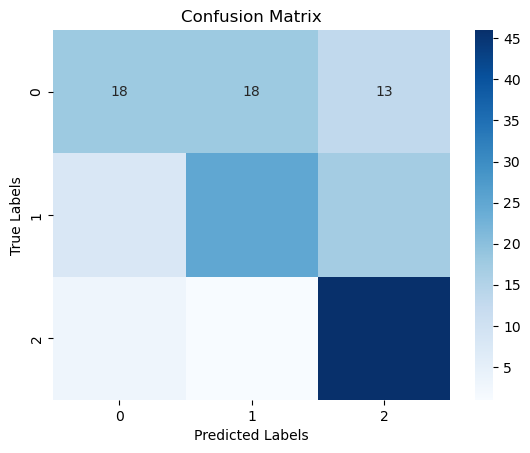

Confusion Matrix for 4 mixtures:


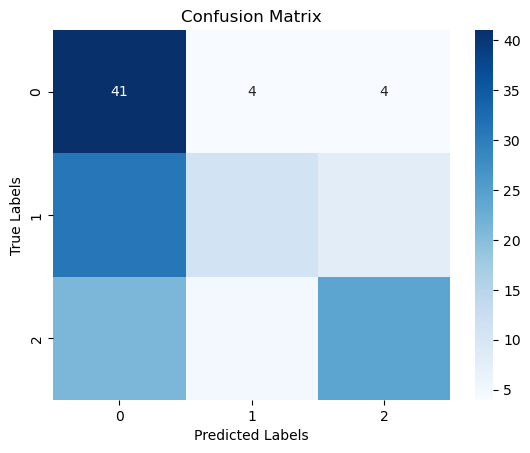

Confusion Matrix for 8 mixtures:


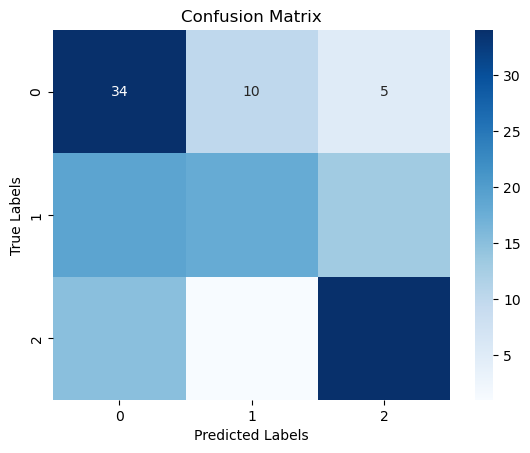

Confusion Matrix for 32 mixtures:


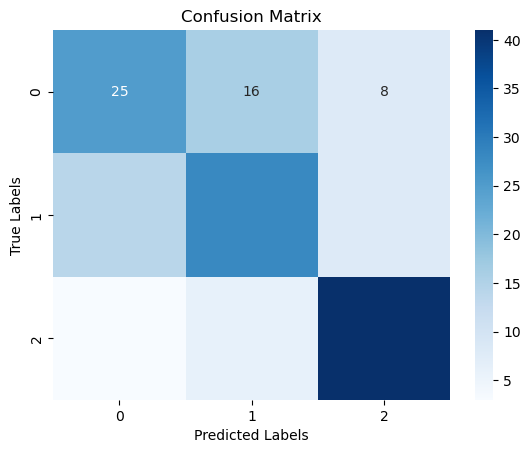

In [ ]:
import numpy as np 
import os
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

class GMMBayesClassifier:
    def __init__(self, n_components_list, random_state=42):
        self.n_components_list = n_components_list
        self.random_state = random_state

    def initialize_gmm_with_kmeans(self, X, n_components):
        kmeans = KMeans(n_clusters=n_components, random_state=self.random_state)
        labels = kmeans.fit_predict(X)
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=self.random_state)
        gmm.means_ = kmeans.cluster_centers_
        gmm.weights_ = np.bincount(labels) / len(X)
        log_likelihoods = []
        for _ in range(100):  
            gmm.fit(X)
            log_likelihoods.append(gmm.lower_bound_)
        gmm.fit(X)  
        return gmm, log_likelihoods

    def fit_and_predict(self, X_train, y_train, X_test):
        results = {}
        gmms = {}
        log_likelihoods = {}
        classes = np.unique(y_train)

        for n_components in self.n_components_list:
            print(f"Evaluating GMM with {n_components} mixtures...")
            gmms_per_class = {}
            priors = {}
            log_likelihoods_per_class = []

            for c in classes:
                X_c = X_train[y_train == c]
                gmm, log_likelihood = self.initialize_gmm_with_kmeans(X_c, n_components)
                gmms_per_class[c] = gmm
                priors[c] = len(X_c) / len(X_train)
                log_likelihoods_per_class.append(log_likelihood)

            gmms[n_components] = gmms_per_class
            log_likelihoods[n_components] = np.mean(log_likelihoods_per_class, axis=0)

            log_probs = []
            for c in classes:
                log_prob = gmms_per_class[c].score_samples(X_test) + np.log(priors[c])
                log_probs.append(log_prob)

            log_probs = np.array(log_probs).T
            y_pred = classes[np.argmax(log_probs, axis=1)]
            results[n_components] = y_pred

        return results, gmms, log_likelihoods

    def evaluate_metrics(self, y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average=None)
        recall = recall_score(y_true, y_pred, average=None)
        f1 = f1_score(y_true, y_pred, average=None)

        mean_precision = precision_score(y_true, y_pred, average='macro')
        mean_recall = recall_score(y_true, y_pred, average='macro')
        mean_f1 = f1_score(y_true, y_pred, average='macro')

        metrics = {
            'accuracy': acc,
            'precision': precision,
            'mean_precision': mean_precision,
            'recall': recall,
            'mean_recall': mean_recall,
            'f1': f1,
            'mean_f1': mean_f1
        }

        return metrics

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()
    
    def plot_log_likelihood(self, log_likelihoods):
        for n_components, log_likelihood in log_likelihoods.items():
            plt.plot(log_likelihood, label=f'{n_components} mixtures')
        plt.title('Iterations vs Log Likelihood')
        plt.xlabel('Iterations')
        plt.ylabel('Log Likelihood')
        plt.legend()
        plt.show()

# Feature Loading Functions
def load_features(directory, feature_type='bovw'):
    features = []
    for file in os.listdir(directory):
        if file.endswith(f'_{feature_type}.npy'):
            feature_path = os.path.join(directory, file)
            feature = np.load(feature_path)
            features.append(feature)
    if not features:
        raise ValueError(f"No features found in {directory} for feature type {feature_type}.")
    return np.array(features)

def load_labels_from_dirs(dirs):
    labels = []
    for i, dir_path in enumerate(dirs):
        num_files = len([f for f in os.listdir(dir_path) if f.endswith('.npy')])
        if num_files == 0:
            raise ValueError(f"No .npy files found in {dir_path}.")
        labels.extend([i] * num_files)
    return np.array(labels)

# Directory Configuration
train_dirs = ['output/bayou/train', 'output/desert_vegetation/train', 'output/music_store/train']
test_dirs = ['output/bayou/test', 'output/desert_vegetation/test', 'output/music_store/test']

X_train_list = [load_features(dir_path) for dir_path in train_dirs]
y_train = load_labels_from_dirs(train_dirs)
X_test_list = [load_features(dir_path) for dir_path in test_dirs]
y_test = load_labels_from_dirs(test_dirs)

X_train_combined = np.vstack(X_train_list)
X_test_combined = np.vstack(X_test_list)

# Model Training and Evaluation
n_components_list = [1, 2, 4, 8, 32]
classifier = GMMBayesClassifier(n_components_list)

# Train and predict
result, gmms, log_likelihood = classifier.fit_and_predict(X_train_combined, y_train, X_test_combined)

# Evaluate metrics
for n_components, y_pred in result.items():
    metrics = classifier.evaluate_metrics(y_test, y_pred)
    print(f"Number of mixtures: {n_components}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print(f"  F1 Score: {metrics['f1']}")
    print(f"  Mean Precision: {metrics['mean_precision']:.4f}")
    print(f"  Mean Recall: {metrics['mean_recall']:.4f}")
    print(f"  Mean F1 Score: {metrics['mean_f1']:.4f}")

# Accuracy Plot
accuracies = [accuracy_score(y_test, y_pred) for y_pred in result.values()]
plt.plot(n_components_list, accuracies, marker='o')
plt.title('Accuracy vs Number of Mixtures')
plt.xlabel('Number of Mixtures')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

for n_components, gmms_per_class in gmms.items():
    for c, gmm in gmms_per_class.items():
        print(f"GMM log-likelihood for {n_components} mixtures, class {c}: {gmm.lower_bound_}")
# Log-likelihood Plot
classifier.plot_log_likelihood(log_likelihood)
